In [1]:
import pandas as pd
import csv
import numpy as np
import requests
import matplotlib.pyplot as plt
import json
from wordcloud import WordCloud, STOPWORDS
from scipy.stats import linregress

In [16]:
kindle_csv = "./kindle_data_clean.csv"
kindle_data = pd.read_csv(kindle_csv)
kindle_data

Unnamed: 0        asin helpful  overall  \
0                0  B000F83SZQ  [0, 0]        5   
1                1  B000F83SZQ  [2, 2]        4   
2                2  B000F83SZQ  [2, 2]        4   
3                3  B000F83SZQ  [1, 1]        5   
4                4  B000F83SZQ  [0, 1]        4   
...            ...         ...     ...      ...   
982592      982614  B00M13FNSS  [2, 2]        5   
982593      982615  B00M13FNSS  [0, 0]        5   
982594      982616  B00M13FNSS  [1, 1]        5   
982595      982617  B00M13FNSS  [0, 0]        5   
982596      982618  B00M13FNSS  [2, 2]        5   

                                               reviewText   reviewTime  \
0       I enjoy vintage books and movies so I enjoyed ...   05 5, 2014   
1       This book is a reissue of an old one; the auth...   01 6, 2014   
2       This was a fairly interesting read.  It had ol...   04 4, 2014   
3       I'd never read any of the Amy Brewster mysteri...  02 19, 2014   
4       If you like period pieces - clothing, lingo, y...  03 19, 2014   
...                                                   ...          ...   
982592  Yasss hunny! This is a great read. That Dre is...  07 23, 2014   
982593  I ENJOYED THIS BOOK FROM BEGINNING TO END NOW ...  07 23, 2014   
982594  Great book! Cherika was a fool. She let that m...  07 23, 2014   
982595  When I say this was an excellent book please b...  07 23, 2014   
982596  This book was everything. I just hope Alexus w...  07 23, 2014   

            reviewerID                         reviewerName  \
0       A1F6404F1VG29J                           Avidreader   
1        AN0N05A9LIJEQ                             critters   
2        A795DMNCJILA6                                  dot   
3       A1FV0SX13TWVXQ  Elaine H. Turley "Montana Songbird"   
4       A3SPTOKDG7WBLN                   Father Dowling Fan   
...                ...                                  ...   
982592  A2Y66HD4J5S7QZ                                Candi   
982593  A17YHECC8H9NEY                               Margie   
982594  A20KO0BPMNREJL                                Nicki   
982595  A1BQO66R6OLCCW                                Nikey   
982596  A2NRGE3CSFY2TQ                                   Yo   

                                 summary  unixReviewTime  
0                     Nice vintage story      1399248000  
1                           Different...      1388966400  
2                                  Oldie      1396569600  
3                     I really liked it.      1392768000  
4                         Period Mystery      1395187200  
...                                  ...             ...  
982592               A Hot Read Indeed!!      1406073600  
982593                    VERY GOOD BOOK      1406073600  
982594                        Great Read      1406073600  
982595                             Wow!!      1406073600  
982596  Great read.hands down #5star hit      1406073600  

[982597 rows x 10 columns]

In [ ]:
review_year = []
for x in kindle_data['reviewTime']:
#     review_year.append = x[-4:]
    print(x[-4:])
# print(review_year)

2014
2014
2014
2014
2014
2014
2014
2014
2013
2011
2014
2011
2013
2012
2013
2014
2013
2009
2014
2012
2013
2012
2014
2011
2014
2012
2014
2008
2013
2014
2013
2009
2014
2012
2013
2010
2014
2013
2013
2010
2009
2012
2013
2013
2013
2014
2013
2013
2009
2013
2014
2013
2014
2013
2013
2014
2010
2014
2013
2014
2012
2013
2013
2013
2013
2012
2009
2008
2012
2012
2008
2012
2010
2009
2013
2014
2010
2011
2013
2009
2010
2009
2014
2011
2009
2013
2014
2008
2013
2012
2010
2013
2014
2010
2011
2009
2012
2010
2013
2011
2013
2012
2012
2008
2014
2008
2012
2013
2008
2013
2009
2013
2014
2013
2012
2014
2013
2011
2009
2012
2013
2014
2009
2013
2014
2011
2010
2009
2009
2009
2009
2009
2011
2014
2013
2013
2011
2009
2013
2013
2013
2013
2013
2013
2012
2010
2013
2011
2013
2013
2013
2013
2013
2013
2013
2013
2012
2013
2009
2013
2013
2013
2013
2010
2012
2012
2013
2014
2013
2013
2013
2013
2013
2013
2012
2011
2013
2010
2011
2012
2014
2012
2014
2014
2013
2014
2013
2010
2013
2014
2013
2013
2013
2013
2013
2012
2013
2014
2013
2014


In [17]:
kindle_group = kindle_data.groupby("asin")
kindle_size = kindle_group.count()
kindle_size

Unnamed: 0  helpful  overall  reviewText  reviewTime  reviewerID  \
asin                                                                           
B000F83SZQ           8        8        8           8           8           8   
B000FA64PA           5        5        5           5           5           5   
B000FA64PK           8        8        8           8           8           8   
B000FA64QO           5        5        5           5           5           5   
B000FBFMVG           9        9        9           9           9           9   
...                ...      ...      ...         ...         ...         ...   
B00LZFHL7Y          16       16       16          16          16          16   
B00LZKMXBI          75       75       75          75          75          75   
B00M029T4O          11       11       11          11          11          11   
B00M0RE7CS          29       29       29          29          29          29   
B00M13FNSS           7        7        7           7           7           7   

            reviewerName  summary  unixReviewTime  
asin                                               
B000F83SZQ             8        8               8  
B000FA64PA             5        5               5  
B000FA64PK             8        8               8  
B000FA64QO             5        5               5  
B000FBFMVG             9        9               9  
...                  ...      ...             ...  
B00LZFHL7Y            16       16              16  
B00LZKMXBI            75       75              75  
B00M029T4O            11       11              11  
B00M0RE7CS            29       29              29  
B00M13FNSS             7        7               7  

[61934 rows x 9 columns]

In [18]:
top_review = kindle_size.loc[kindle_size["overall"] == kindle_size["overall"].max()]
top_reviews = kindle_data.loc[kindle_data["asin"] == top_review.index[0]]
top_reviews

Unnamed: 0        asin helpful  overall  \
143180      143181  B006GWO5WK  [0, 0]        5   
143181      143182  B006GWO5WK  [0, 0]        5   
143182      143183  B006GWO5WK  [0, 0]        5   
143183      143184  B006GWO5WK  [0, 0]        3   
143184      143185  B006GWO5WK  [0, 0]        5   
...            ...         ...     ...      ...   
144287      144289  B006GWO5WK  [0, 0]        5   
144288      144290  B006GWO5WK  [0, 0]        5   
144289      144291  B006GWO5WK  [0, 0]        3   
144290      144292  B006GWO5WK  [0, 0]        5   
144291      144293  B006GWO5WK  [0, 0]        5   

                                               reviewText   reviewTime  \
143180  Absolute necessity! It works very well and wit...  12 26, 2012   
143181  A CHARGER IS A CHARGER NO MATTER WHAT...BUT IT...   01 4, 2013   
143182  After running out of power and taking up to tw...   03 7, 2013   
143183  All chargers should be included when you buy a...  04 10, 2013   
143184  All-in-all a good charger, a little pricey and...  02 19, 2013   
...                                                   ...          ...   
144287  It charges beautifully, it arrived at lighteni...  06 14, 2013   
144288  I thought I didn't need this piece; however, I...  07 19, 2013   
144289  I was hoping this will resolve the issue of th...  06 25, 2013   
144290  I was only charging my Kindle with the USB por...  10 31, 2013   
144291  This really powers up the Kindle in no time at...  07 25, 2013   

            reviewerID                    reviewerName  \
143180   AMDEJDMYCTOLY                             NaN   
143181  A2KT57BI8BNQFQ                             NaN   
143182  A36T4JVDWRHMFY                             NaN   
143183  A20Q8TV5DMDZ9V                             NaN   
143184   ABZPT2SS28CRV                             NaN   
...                ...                             ...   
144287  A2NN1T9YXW5Y0M  Wren's Nest "So Happy At Home"   
144288   A8686GF69BQMU                        Xena1002   
144289  A2GIFDZJCAFSLJ                  Yesenia Puello   
144290  A3DRXPYH1U3AHY                           Yummo   
144291  A240JSQJGOTGMD                          Yvonne   

                                                  summary  unixReviewTime  
143180                                         plug me in      1356480000  
143181  Amazon Kindle PowerFast for Accelerated Chargi...      1357257600  
143182                                   Necessary "Evil"      1362614400  
143183                          should have been included      1365552000  
143184                                    Good charger...      1361232000  
...                                                   ...             ...  
144287                         Kindle Charger...It Works!      1371168000  
144288                                Great super charge!      1374192000  
144289                                not what I expected      1372118400  
144290                                              easy!      1383177600  
144291                                          Must have      1374710400  

[1112 rows x 10 columns]

In [19]:
top_reviews["overall"].mean()

4.5359712230215825

In [31]:
top_group = top_reviews.groupby("unixReviewTime")
top_mean = top_group["overall"].mean()
top_mean

unixReviewTime
1347580800    4.666667
1347667200    5.000000
1348012800    5.000000
1348099200    5.000000
1348185600    3.000000
                ...   
1405036800    3.000000
1405123200    5.000000
1405209600    5.000000
1405296000    5.000000
1405382400    4.000000
Name: overall, Length: 486, dtype: float64

y = 0.0x + -2.26
0.09131094799073969


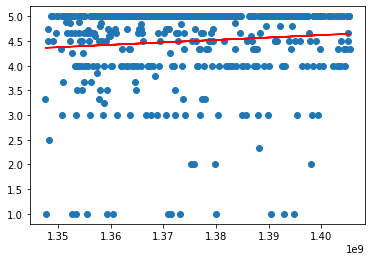

In [33]:
plt.scatter(top_reviews["unixReviewTime"].unique(), top_mean)

(slope, intercept, rvalue, pvalue, stderr) = linregress(top_reviews["unixReviewTime"].unique(), top_mean)
regress_values = top_reviews["unixReviewTime"].unique() * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.plot(top_reviews["unixReviewTime"].unique(),regress_values,"r-")
print(line_eq)
print(rvalue)

In [50]:
top_reviews = top_reviews[["asin", "overall", "unixReviewTime"]]
top_reviews = top_reviews.sort_values("unixReviewTime")
top_reviews

asin  overall  unixReviewTime
143783  B006GWO5WK        5      1347580800
143956  B006GWO5WK        5      1347580800
143648  B006GWO5WK        4      1347580800
144032  B006GWO5WK        5      1347667200
143906  B006GWO5WK        5      1348012800
...            ...      ...             ...
143666  B006GWO5WK        5      1405036800
144231  B006GWO5WK        5      1405123200
144148  B006GWO5WK        5      1405209600
143717  B006GWO5WK        5      1405296000
143418  B006GWO5WK        4      1405382400

[1112 rows x 3 columns]

In [51]:
rating_sum = 0
rating_count = 0
avg_list = []

for x in top_reviews.index:
    rating_sum += top_reviews["overall"][x]
    rating_count += 1
    avg_list.append(rating_sum / rating_count)
    
top_reviews["Average Rating (cum)"] = avg_list
top_reviews

asin  overall  unixReviewTime  Average Rating (cum)
143783  B006GWO5WK        5      1347580800              5.000000
143956  B006GWO5WK        5      1347580800              5.000000
143648  B006GWO5WK        4      1347580800              4.666667
144032  B006GWO5WK        5      1347667200              4.750000
143906  B006GWO5WK        5      1348012800              4.800000
...            ...      ...             ...                   ...
143666  B006GWO5WK        5      1405036800              4.535199
144231  B006GWO5WK        5      1405123200              4.535618
144148  B006GWO5WK        5      1405209600              4.536036
143717  B006GWO5WK        5      1405296000              4.536454
143418  B006GWO5WK        4      1405382400              4.535971

[1112 rows x 4 columns]

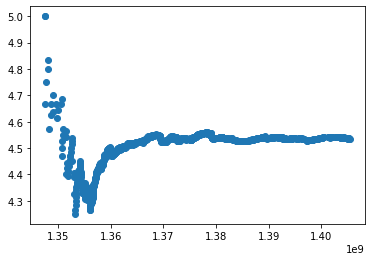

In [52]:
plt.scatter(top_reviews["unixReviewTime"], top_reviews["Average Rating (cum)"])